In [1]:
import pandas as pd
import seaborn as sns

import sys
sys.path.append('/Users/familyafanasyevy/Documents/Денис/Skillfactory/vulnerable_populations/additional_functions')
from functions import to_modify_dataframe

##### Прочитаем и преобразуем данные о расходах на социальную политику.

In [2]:
welfare_expense_share = pd.read_excel(io='../social_russia_data/welfare_expense_share_2015_2020.xlsx', sheet_name=0, header=0, index_col=0)
welfare_expense_share = to_modify_dataframe(welfare_expense_share)
welfare_expense_share = welfare_expense_share.rename(lambda arg: f'Расходы на соцполитику от общих расходов бюджета региона в {arg} году, % в год', axis=1)
welfare_expense_share.head()

Число регионов России - 85.


,"Расходы на соцполитику от общих расходов бюджета региона в 2015 году, % в год","Расходы на соцполитику от общих расходов бюджета региона в 2016 году, % в год","Расходы на соцполитику от общих расходов бюджета региона в 2017 году, % в год","Расходы на соцполитику от общих расходов бюджета региона в 2018 году, % в год","Расходы на соцполитику от общих расходов бюджета региона в 2019 году, % в год","Расходы на соцполитику от общих расходов бюджета региона в 2020 году, % в год"
Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1
Брянская область,22.0,26.6,24.7,23.7,20.7,23.1
Владимирская область,18.1,18.0,24.0,23.4,23.4,26.0
Воронежская область,15.2,15.4,22.8,20.9,19.0,21.6
Ивановская область,18.1,28.9,28.7,27.0,25.1,25.1


##### Смотрим корреляцию.

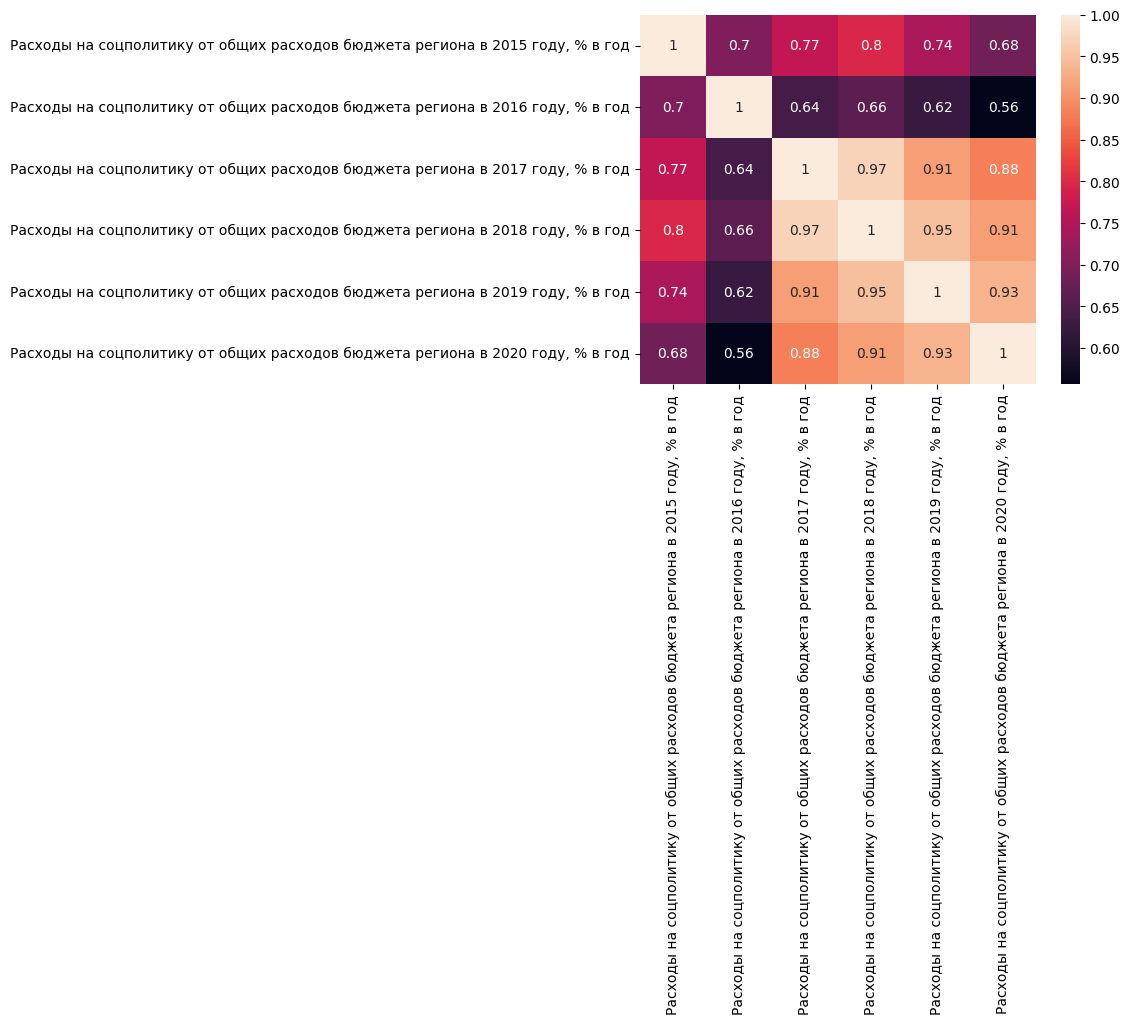

In [3]:
sns.heatmap(welfare_expense_share.corr(), annot=True);

##### Здесь имеются пары признаков с очень сильной корреляцией (выше 0.9 по абсолютной величине). Я предлагаю удалить данные за 2018 и 2019 года, чтобы оставить признаки с корреляцией меньше 0.9 по абсолютной величине.

In [4]:
welfare_expense_share = welfare_expense_share.drop(columns=[
    'Расходы на соцполитику от общих расходов бюджета региона в 2018 году, % в год',
    'Расходы на соцполитику от общих расходов бюджета региона в 2019 году, % в год'
])

In [5]:
welfare_expense_share.to_csv('../datasets_mod/welfare_expense_share.csv', sep=',')